In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.api import VAR
from spillpy import Spillover

In [49]:
# random data
np.random.seed(2022)
data = np.random.normal(size = (500, 4))

In [50]:
# rolling window spillover
window = 100
spillover_index = []
for i in range(len(data) - window):
    dd = data[i:i+window]
    model = VAR(dd)
    res = model.fit()
    
    so = Spillover(res)
    so.fit()    
    
    spillover_index.append(so.spillover_index())

Text(0, 0.5, 'total spillover index')

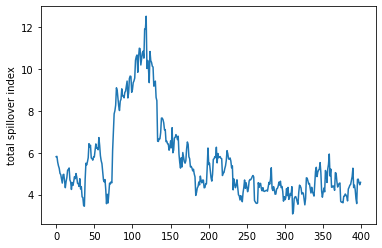

In [53]:
plt.plot(spillover_index)
plt.ylabel('total spillover index')

In [54]:
# full sample
model = VAR(data)
res = model.fit()
so = Spillover(res)
so.fit()

so.spillover_table(to_pandas = True)

,y1,y2,y3,y4,dir_to
y1,98.694906,0.368261,0.246100,0.690734,1.305094
y2,0.369108,98.585362,0.669034,0.376496,1.414638
y3,0.153722,0.637051,99.198414,0.010812,0.801586
y4,0.033778,0.358349,0.051067,99.556806,0.443194
dir_from,0.556608,1.363661,0.966201,1.078041,0.991128
